In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Choose one variable and plot that variable four different ways.

In [2]:
bank = pd.read_csv('bank.csv', sep=';')

In [3]:
print(bank.age.describe())
bank.head()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


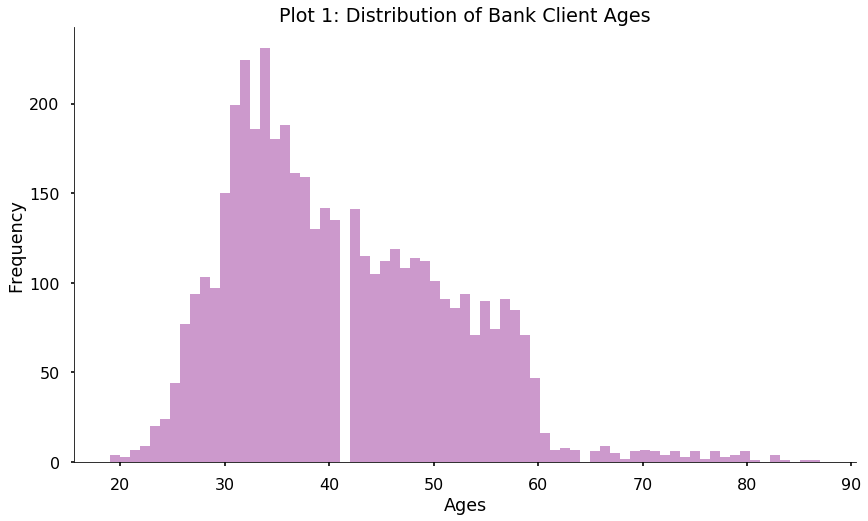

In [4]:
# Histogram of bank client ages
sns.set_context('poster', font_scale=1)
age_dist_fig, age_dist_ax = plt.subplots(figsize=(14, 8))
sns.distplot(bank.age, kde=False, ax=age_dist_ax, bins=71, color='purple')
age_dist_ax.set_title('Plot 1: Distribution of Bank Client Ages')
age_dist_ax.set_xlabel('Ages')
age_dist_ax.set_ylabel('Frequency')
sns.despine(fig=age_dist_fig)
plt.show()

## Histogram pros and cons
I can see the shape of the variable and categorize its skew, but I can't see the appropriate central tendency/SD.

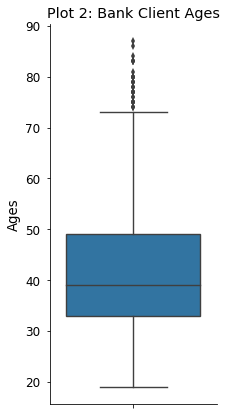

In [5]:
# Visualizing bank client age variance
sns.set_context('paper', font_scale=1.5)
age_box_fig, age_box_ax = plt.subplots(figsize=(3, 7))
sns.boxplot(y='age',data=bank, ax=age_box_ax)
age_box_ax.set_title('Plot 2: Bank Client Ages')
age_box_ax.set_ylabel('Ages')
sns.despine(fig=age_box_fig)
plt.show()

## Boxplot pros and cons
I can see where the population is clustered, the central tendency, and outlier cutoffs, but I can't see the standard deviation nor the shape. Also, this variable's statistics aren't being compared amongst groups, so I would consider other plots before this.

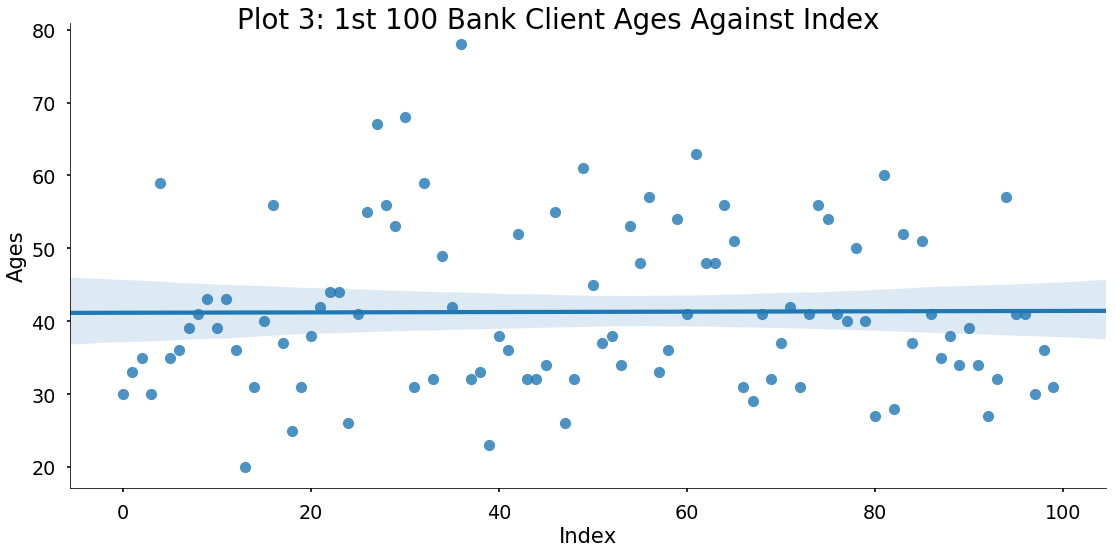

In [6]:
# Visualizing scatterplot of bank client ages against the index
sns.set_context('poster', font_scale=1.2)
# reducing the amount plotted for clarity
age_scat_grid = sns.lmplot(size=8, aspect=2, x='index', y='age', data=bank.reset_index()[0:100], fit_reg=True)

age_scat_grid.fig.suptitle('Plot 3: 1st 100 Bank Client Ages Against Index')
age_scat_grid.set_xlabels('Index')
age_scat_grid.set_ylabels('Ages')
sns.despine(fig=age_scat_grid.fig)
plt.show()

## Scatterplot pros and cons
Though I have not plotted dates, I am able to observe the association between this variable and time (the data was chronologically collected). However, the x axis is not properly scaled for the recorded dates and I had to shorten the time interval because I couldn't find Google Search support to scale it.

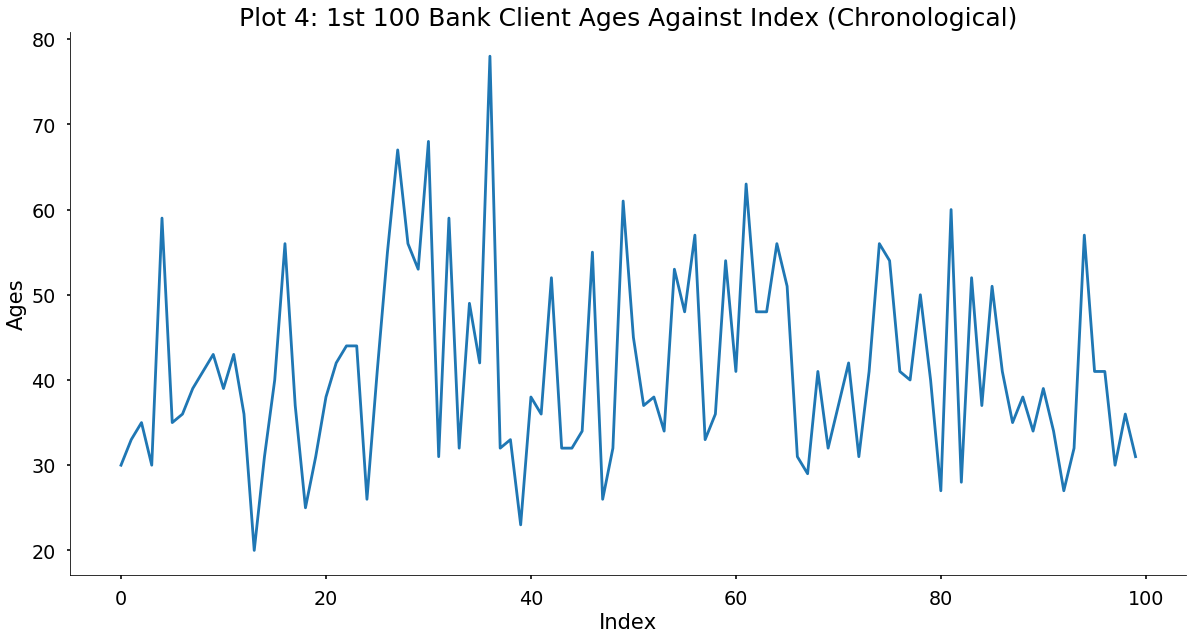

In [7]:
# Visualizing lineplot of bank client ages against the index, which is chronological
age_line_fig, age_line_ax = plt.subplots(figsize=(20, 10))
sns.set_context('poster', font_scale=1.3)

# Reducing amount plotted for clarity
age_line_ax.plot(bank.age[0:100])

age_line_ax.set_title('Plot 4: 1st 100 Bank Client Ages Against Index (Chronological)')
age_line_ax.set_xlabel('Index')
age_line_ax.set_ylabel('Ages')
sns.despine(fig=age_line_fig)
plt.show()

## Lineplot pros and cons
The same as a scatterplot except the scaling issue is worse and the narrative power is better. One has to feature engineer to decide how data collected on the same day shall be visualized. This engineering also has to jive with an altered x axis. The narrative power is enhanced because the line helps me explain a relationship between variable values and time if one occurred during the experiment.

# Choose two continuous variables, and plot them three different ways.

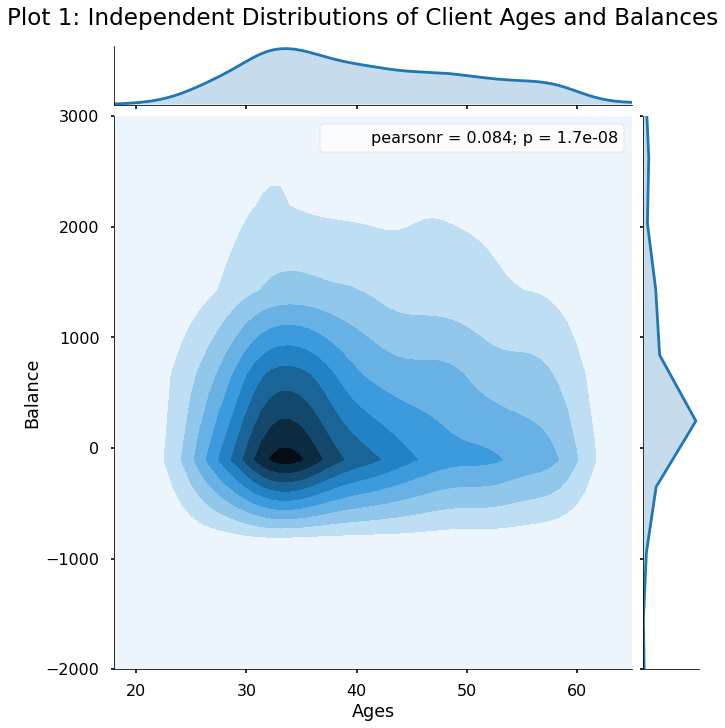

In [8]:
# Visualizing bank client balance and age distributions
sns.set_context('poster')
age_bal_kde_grid = sns.jointplot(ylim=(-2000, 3000), xlim=(18, 65), size=10, ratio=8, x='age',y='balance', data=bank, kind='kde')
age_bal_kde_grid.fig.suptitle('Plot 1: Independent Distributions of Client Ages and Balances', y=1.02)
age_bal_kde_grid.set_axis_labels(xlabel='Ages', ylabel='Balance')
sns.despine(fig=age_bal_kde_grid.fig)
plt.show()

## KDE plot pros and cons
I can compare clustering and dispersion between variables of each member in the population, but the plot is very sensitive to feature engineering and the distributions are estimates rather than datapoints.

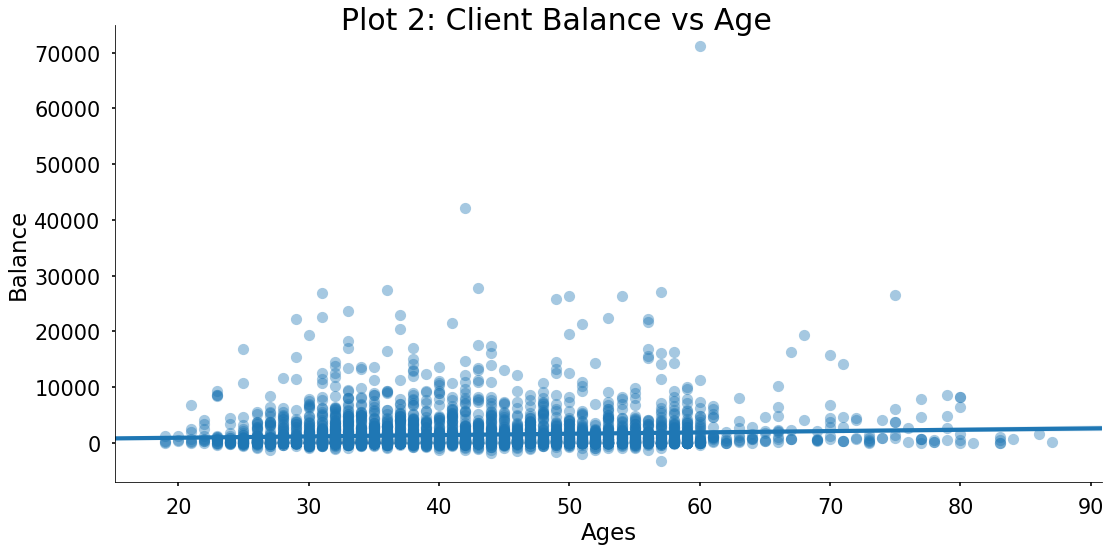

In [9]:
# Visualizing association between client balance and age
sns.set_context('poster', font_scale=1.3)
age_bal_scat_grid = sns.lmplot(ci=95, size=8, aspect=2, x='age', y='balance', data=bank, scatter_kws={'alpha': 0.4})
age_bal_scat_grid.fig.suptitle('Plot 2: Client Balance vs Age')
age_bal_scat_grid.set_axis_labels(x_var='Ages', y_var='Balance')
sns.despine(fig=age_bal_scat_grid.fig)
plt.show()

## Scatterplot pros and cons
This is the bread and butter of observing the association of two variables, but the large amount of data makes it cluttered and the low correlation means it's not saying much and a better plot should be used.

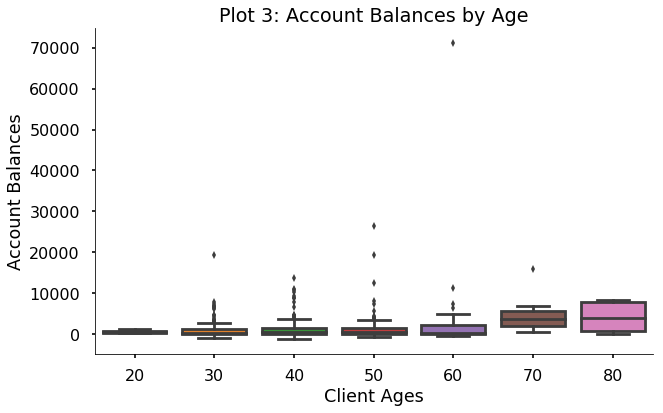

In [10]:
# Visualizing bank client account balance variance by age
sns.set_context('poster')
age_bal_box_fig, age_bal_box_ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='age', y='balance',data=bank, order=range(20,90,10), ax=age_bal_box_ax)
age_bal_box_ax.set_title('Plot 3: Account Balances by Age')
age_bal_box_ax.set_xlabel('Client Ages')
age_bal_box_ax.set_ylabel('Account Balances')
sns.despine(fig=age_bal_box_fig)
plt.show()

## Boxplot pros and cons
The x axis was ordered so that categories were specified, allowing us to see variances between groups of values. We also get to see where the data clusters for each category. However, outliers and low category populations must be addressed in feature engineering. I also don't see the shapes for each. 

# Choose one continuous variable and one categorical variable, and plot them six different ways.

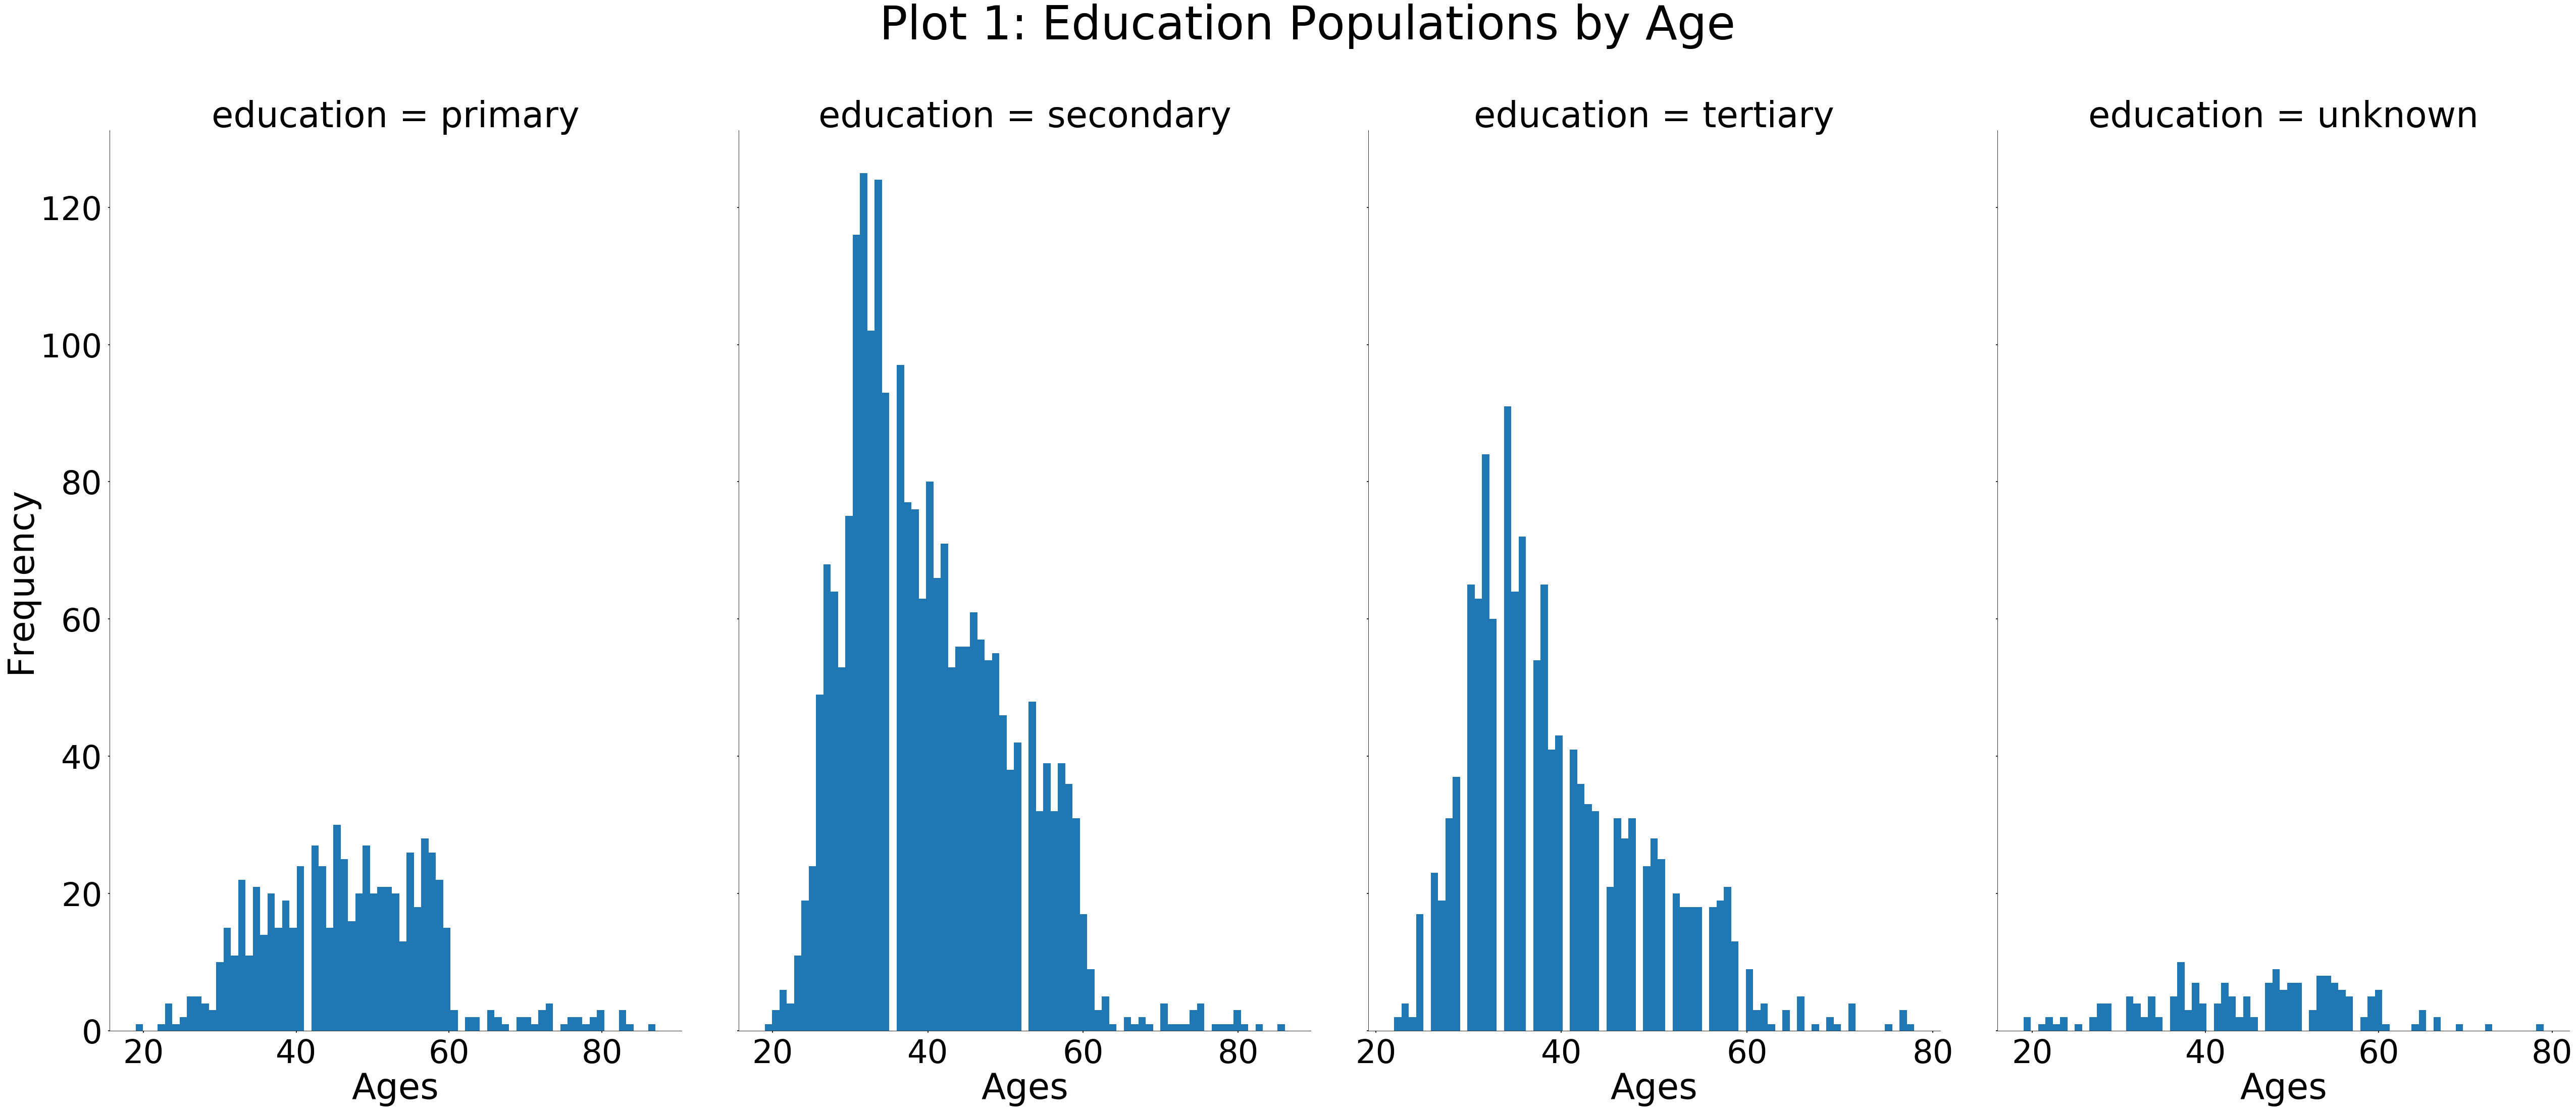

In [11]:
# Histograms of ages by education
sns.set_context('poster', font_scale=4)
age_edu_grid = sns.FacetGrid(bank, col = 'education', sharex=False, size=30, aspect=.6)
age_edu_grid.map(plt.hist, 'age', bins=71)
age_edu_grid.fig.suptitle('Plot 1: Education Populations by Age', y=1.05)
age_edu_grid.set_axis_labels(x_var='Ages', y_var='Frequency')
sns.despine(fig=age_edu_grid.fig)
plt.show()

## Histogram pros and cons
I am able to distinctly see the shape of data for each group. Unfortunately, I don't know yet how to feature engineer so that each category is engineered according to its particular shape. Also, the "unknown" category has such a small population of the data that we cannot see its shape. Additionally, I don't see the central tendency for each category.

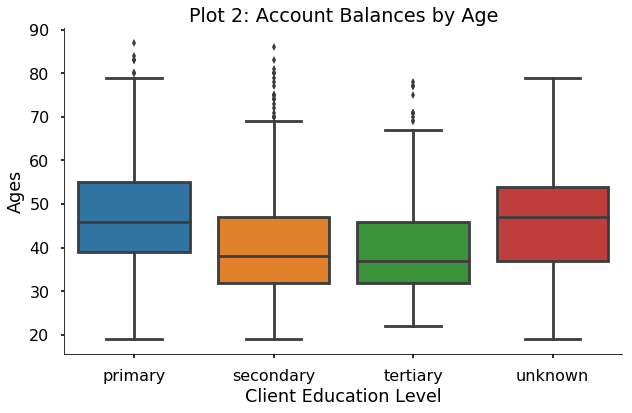

In [12]:
# Visualizing bank client age variance by education level
sns.set_context('poster')
age_edu_box_fig, age_edu_box_ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='education', y='age',data=bank, ax=age_edu_box_ax)
age_edu_box_ax.set_title('Plot 2: Account Balances by Age')
age_edu_box_ax.set_xlabel('Client Education Level')
age_edu_box_ax.set_ylabel('Ages')
sns.despine(fig=age_edu_box_fig)
plt.show()

## Boxplot pros and cons
Unlike the histogram plot, I can compare the central tendencies and outliers of each category. However, I can't see the shape of each category's distribution nor the standard errors. 1.5 IQR is not a widely used unit of variance.

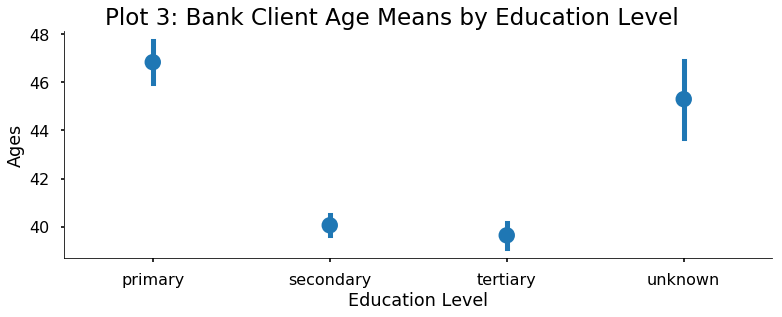

In [13]:
# Visualizing bank client central tendencies by education level
sns.set_context('poster')
age_edu_fact_ax = sns.factorplot(x='education', y='age', size=4.5, aspect=2.5, data=bank, kind='point', join=False, dodge=True, ci=95)
age_edu_fact_ax.fig.suptitle('Plot 3: Bank Client Age Means by Education Level', y=1)
age_edu_fact_ax.set_xlabels('Education Level')
age_edu_fact_ax.set_ylabels('Ages')
sns.despine(fig=age_edu_fact_ax.fig)
plt.show()

## Pointplot pros and cons
I can compare the standard errors. Additionally, I can compare central tendencies of each category more specifically than the boxplot. However, I cannot compare population sizes for each category.

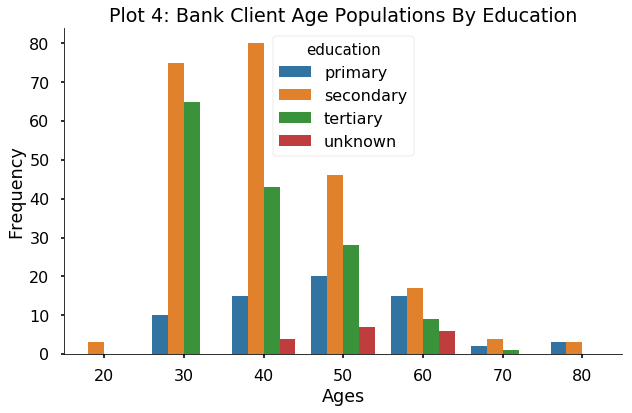

In [14]:
# Visualizing age populations of each education level
sns.set_context('poster')
age_edu_count_fig, age_edu_count_ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='age', hue='education', data=bank, order=range(20,90,10), ax=age_edu_count_ax)
age_edu_count_ax.set_title('Plot 4: Bank Client Age Populations By Education')
age_edu_count_ax.set_xlabel('Ages')
age_edu_count_ax.set_ylabel('Frequency')
sns.despine(fig=age_edu_count_fig)
plt.show()

## Bar plot (count) pros and cons
I can compare the age population sizes for each category, but it exaggerates the magnitude of differences in sizes.

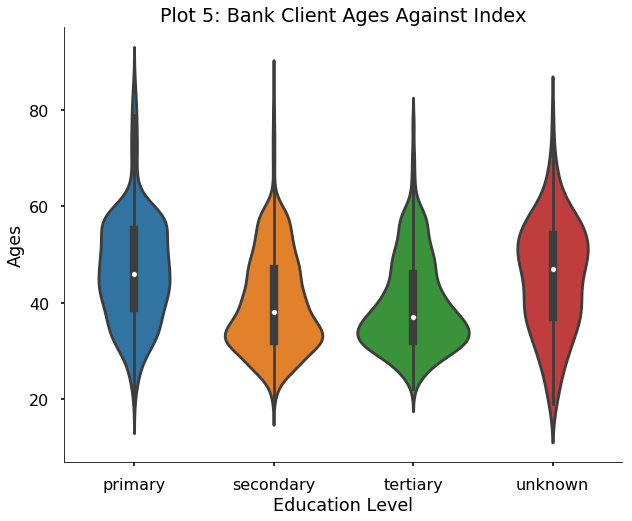

In [15]:
# Visualizing age variance by education level
sns.set_context('poster')
age_edu_viol_fig, age_edu_viol_ax = plt.subplots(figsize=(10, 8))
sns.violinplot(y='age', x='education', data=bank, ax=age_edu_viol_ax)
age_edu_viol_ax.set_title('Plot 5: Bank Client Ages Against Index')
age_edu_viol_ax.set_xlabel('Education Level')
age_edu_viol_ax.set_ylabel('Ages')
sns.despine(fig=age_edu_viol_fig)
plt.show()

## Violin plot pros and cons
I can compare the shapes of each category, but these are estimates and are sensitive to small populations like "unknown"

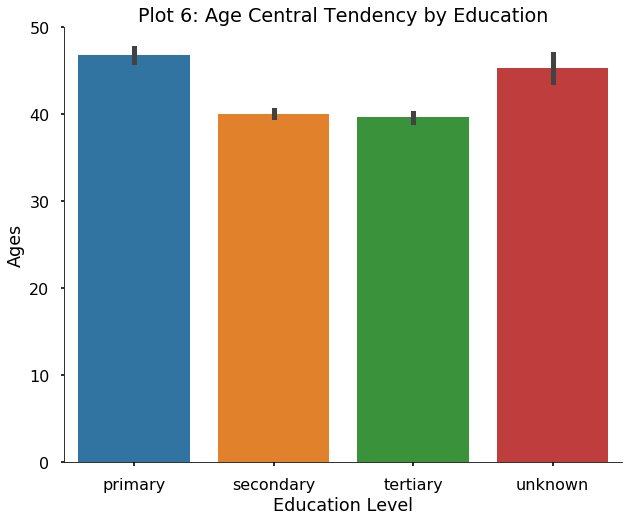

In [16]:
# Visualizing age central tendency by education level
sns.set_context('poster')
age_edu_bar_fig, age_edu_bar_ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='education', y='age', data=bank, ax=age_edu_bar_ax)
age_edu_bar_ax.set_title('Plot 6: Age Central Tendency by Education')
age_edu_bar_ax.set_xlabel('Education Level')
age_edu_bar_ax.set_ylabel('Ages')
sns.despine(fig=age_edu_bar_fig)
plt.show()

## Bar plot (central tendency) pros and cons
The same for the other bar plot but maybe the cons are worse since this is plotting central tendency.

# As an optional challenge, find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:

- Probability distributions
- Bivariate relationships
- Whether the distributions or the relationships vary across groups

Accompany your plot with a written description of what you see.